
# <p style="text-align: center;">EE 380L:  Data Mining</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: 100 </p>
## <p style="text-align: center;">Due: Wed Mar 4, 2020, submitted via Canvas by 11:59 pm </p>

Your homework should be written in a **Jupyter notebook**. It is an individual homework. Be sure to include name and UTID. 

Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: MLR using scikit-learn (20 pts)

Consider the datasets (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales: sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the three feature variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the coefficient on TV and what is its interpretation?
3. Split the data randomly into a training and test set (1/3 for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.



/Users/sinarafati/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Number of rows: 200
Number of columns: 4

The first 5 rows:

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


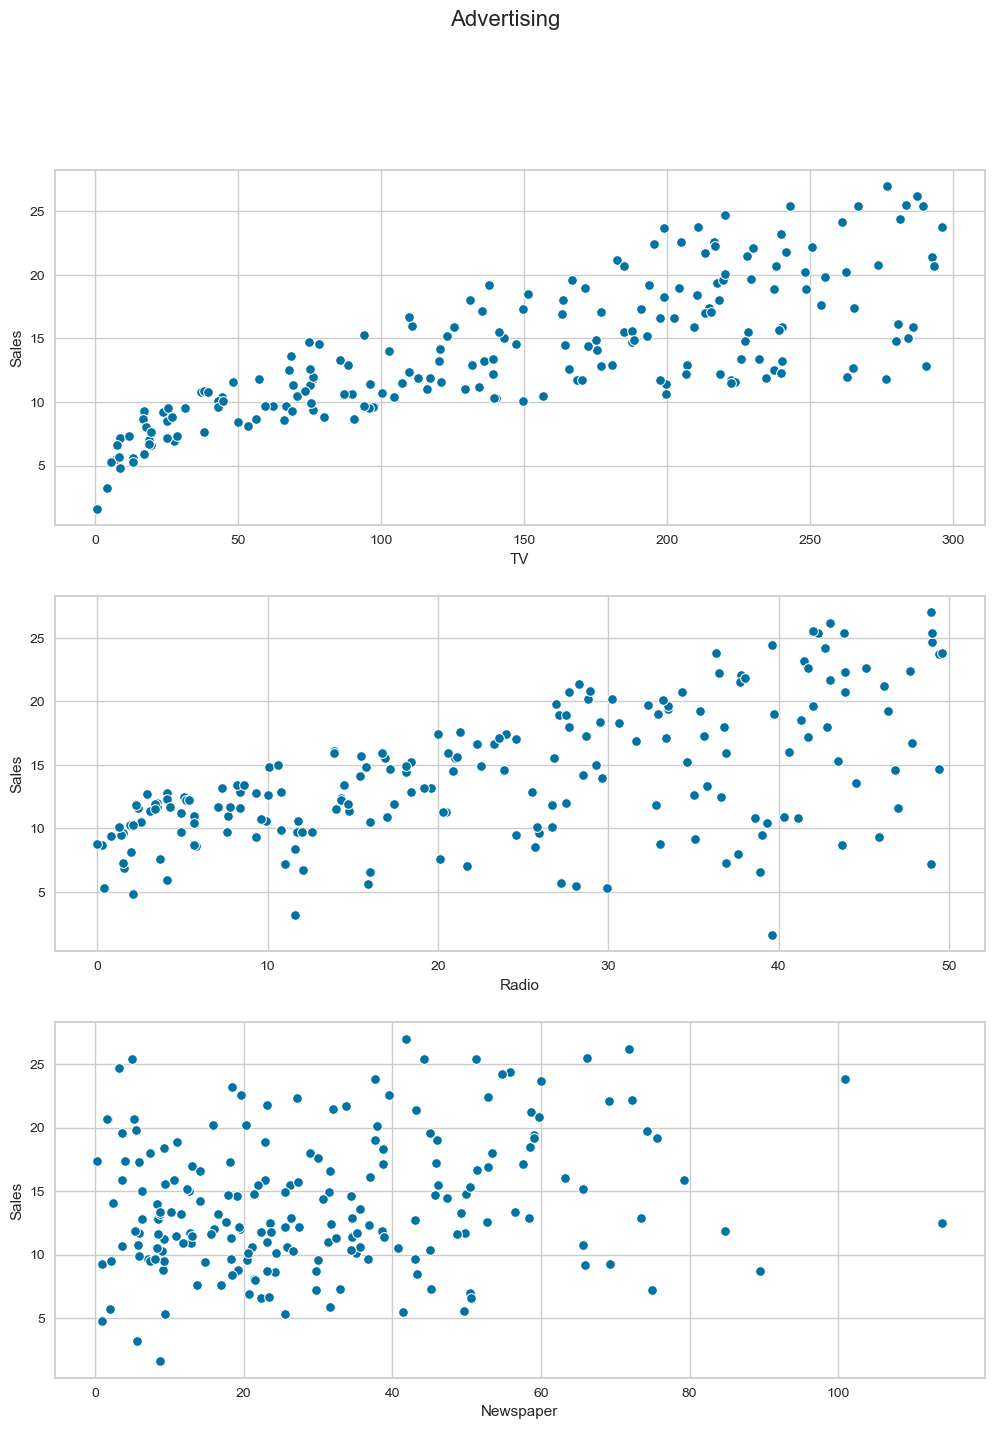

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,linear_model,model_selection,neighbors,tree
from yellowbrick.regressor import ResidualsPlot

#Q1.1
df_adv=pd.read_csv('Advertising.csv')
df_adv=df_adv[['TV','Radio','Newspaper','Sales']]

print('Number of rows: {}'.format(df_adv.shape[0]))
print('Number of columns: {}'.format(df_adv.shape[1]))
print('')
print('The first 5 rows:')
print('')
print(df_adv.head(5))

fig=figure(num=None, figsize=(12, 16), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle('Advertising', fontsize=16)
for k,kk in enumerate (df_adv.columns[:-1]):
    ax1=plt.subplot(3, 1, k+1)
    sns.scatterplot(x=kk, y="Sales", data=df_adv)

### comments on the scatter plots

1- There is a positive correlation between sales and the advertisment on TV. This means that the more advertisement on TV the higher is the amount of sale. Although the correlation doest not seem to be linear. It seems that as the advertisement get higher the sales seems to converge to a platu. So it has a nonlinear relation.

2- There is a positive correlation between sales and the advertisment on Radio. This means that the more advertisement on Radio the higher is the amount of sale. The correlation seems to be more linear with respect to the advertisement on TV.

It is noteworthy that the variation of the data for the Radio case seems to be higher than the TV case.

3- It does not seem that there is a significant correlation between sales and advertisement in newspaper. There are some datapoints which shows higher sale with advertisement on newspapers but there is no systematic relation. 

Coefficients: 
 [[0.04753664]]

Mean squared error: 10.51


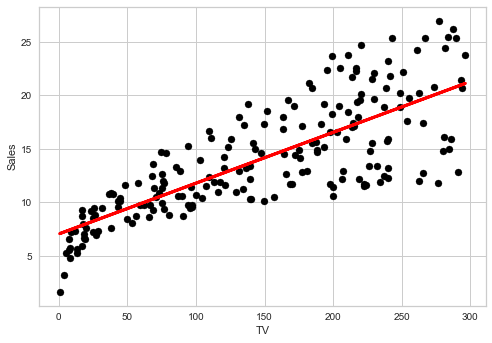

In [2]:
regr = linear_model.LinearRegression()
x=df_adv['TV'].to_numpy()
y=df_adv['Sales'].to_numpy()
x=np.expand_dims(x, 1)
y=np.expand_dims(y, 1)
regr.fit(x, y)
print('Coefficients: \n', regr.coef_)
print('')
y_pred = regr.predict(x)
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y, y_pred))

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


### interpretation
The coefficient of linear regression is 0.047. This shows the rate of change of average sales per unit change of TV advertisement. Therefore, for 1 thousands of dollars  of TV advertisemnent, the sales increases as 0.047* 1 thousands of widgets 

In [3]:
X=df_adv[['TV','Radio','Newspaper']]
Y=df_adv['Sales']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=0,test_size=0.33)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('')
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
print('test set, root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('train set, root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('test set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(y_test,y_test_pred)))
print('train set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(y_train,y_train_pred)))

print('')
print('Coefficients: \n', regr.coef_)
print('')
print('the overall regression eqn is:')
print('')
print('sales = {} + {} * TV +  {} * Radio + {} * Newspaper'.format(round(regr.intercept_,4),round(regr.coef_[0],4),round(regr.coef_[1],4),round(regr.coef_[2],4)))




test set, root mean squared error: 1.85
train set, root mean squared error: 1.59
test set mean squared error (MSE): 3.44
train set mean squared error (MSE): 2.53

Coefficients: 
 [0.04433887 0.19659119 0.00264541]

the overall regression eqn is:

sales = 2.9042 + 0.0443 * TV +  0.1966 * Radio + 0.0026 * Newspaper


As is it shown, the MSE of the train data is lower by almost 35% (note that since we are randomly splitting data to train and test this number might change slightly). there are two possibilites 

1- might be due to overfitting to the training data

2- the fact that the data does not have a linear trend so a linear regression is not good choice for modeling the variability of estimated sales using the TV advertisements as the feature. 

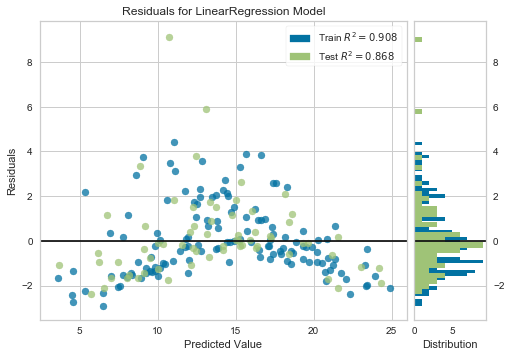

In [4]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()                 


Apparantly the linear assumption does not appear to hold. The residual plot seems to have “U” shaped pattern rather than a flat pattern clustered around zero which means a nonlinear behavior. Therefore this represent nonlinearity in the data which suggest that linear model was not a good choice 

# Question 2: Lasso Regression (6+6+4+4=20 points)

In this question, you will explore the application of Lasso regression using sklearn package in Python. The dataset is Hitters.csv (available on canvas), which contains performance records and salaries for baseball players. More information on the data can be found [here](https://rdrr.io/cran/ISLR/man/Hitters.html). There are 17 variables -- first 16 columns are performance related features and the last columns is for Salary. We wish to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).  
Note: The regularization strength parameter, typically referred to as $\lambda$, is called alpha in sklearn.

1. Use sklearn.linear_model.Lasso class to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

    import numpy as np

    alphas =  10\*\*np.linspace(10,-2,100) \* 0.5

    Report the best chosen $\lambda$ based on cross validation. The cross validation should be performed on the training data and use average MSE as the scoring metric.
2. For each value of the alpha parameter specified above, run lasso on the full training data and store the coefficients learned for each feature. Plot each feature's coefficient versus the regularization parameter. Make sure the x-axis is log scale. What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression and lasso on the training data. For lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. Run lasso again with built-in cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

    Report the best $\lambda$ based on cross validation. Run lasso on the training data using this best $\lambda$ and report the coefficients for 16 variables. What do you observe from these coefficients?
    

In [59]:
# Q1

def MSE(y_true,y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    return mse
def score_fcn(y_true,y_pred):    
    score = MSE(y_true,y_pred)
    return score
def score_fcns():
    return metrics.make_scorer(score_fcn, greater_is_better=False) 


df_hitters=pd.read_csv('Hitters.csv')

XH=df_hitters.loc[:, df_hitters.columns != 'Salary']
YH=df_hitters['Salary']
XH_train, XH_test, yH_train, yH_test = model_selection.train_test_split(XH, YH, random_state=42,test_size=0.33)

lasso = linear_model.Lasso(random_state=42, max_iter=10000)
alphas = 10**np.linspace(10,-2,100) * 0.5
tuned_parameters = [{'alpha': alphas}]

n_folds = 5
num_test=np.round(XH_train.shape[0]/n_folds)
### Note that I have considered two approaches for looping over folds and alphas one is using manual procedure
### and the other one is using the gridsearch. Note that in method one since it is looping over a lot, it is much 
### more time consuming... for now I have commented them out. I did the first method due to the question 140 on Piazza

### method 1 

# score_total=[]
# lp=0
# for alphas_val in alphas:
#     lp=lp+1
#     print(lp)
#     score_list=[]
#     for k in range(n_folds):
#         Xh_c_test=XH_train.iloc[int(num_test*(k)):int(num_test*(k+1))]
#         yh_c_test=yH_train.iloc[int(num_test*(k)):int(num_test*(k+1))]
#         lst= XH_train.isin(X_test)['Errors']
#         Xh_c_train=XH_train[~lst]
#         yh_c_train=yH_train[~lst]
#         clf.fit(Xh_c_train, yh_c_train)
#         score_list.append(np.mean(clf.predict(Xh_c_test)-yh_c_test)**2)
#     score_total.append(np.mean(score_list))    
# best_alpha_est=alphas[np.argmin(score_total)]

#### method 2 
clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring=score_fcns(), return_train_score=True)
clf.fit(XH_train, yH_train)
best_params = clf.best_params_

print('The best alpha is {}'.format(best_params['alpha']))
# print('The best alpha is {}'.format(best_alpha_est))

The best alpha is 4348.745013088917


In [61]:
# Q2
Coeff_log=[]
for k in alphas:
    clf = linear_model.Lasso(alpha=k,random_state=42, max_iter=10000)
    clf.fit(XH_train, yH_train)
    Coeff_log.append(clf.coef_)
Coeff_log=np.asarray(Coeff_log)

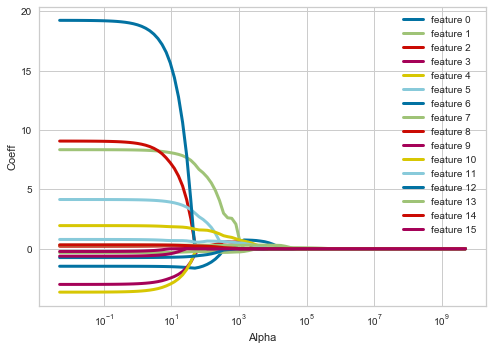

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for k in range(Coeff_log.shape[1]):
    ax.plot(alphas, (Coeff_log[:,k]), linewidth=3,label='feature %s' % k)
    
ax.set_xscale('log')    
plt.xlabel('Alpha')
plt.ylabel('Coeff')
plt.legend()

Apparantly as we increase the alpha gradually all the coefficients reduce down to zero. The idea behind the alpha is that it will help for reduction of variance by regularization of the changes in the loops of model training. so the higher the alpha the less dependet become the model with respect to the features to an extent that it generates all coefficient to be zero and model will be independent of the features and the only remain term would be the intercept. 

In [64]:
clf = linear_model.Lasso(alpha=best_params['alpha'],random_state=42, max_iter=10000)
clf.fit(XH_train, yH_train)

reg = linear_model.LinearRegression().fit(XH_train, yH_train)

error_lasso=np.sqrt(np.mean(clf.predict(XH_test)-yH_test)**2)
error_reg=np.sqrt(np.mean(reg.predict(XH_test)-yH_test)**2)

error_lassom=(np.mean(clf.predict(XH_test)-yH_test)**2)
error_regm=(np.mean(reg.predict(XH_test)-yH_test)**2)

print(' Lasso, root mean squared error: %.2f'
      % error_lasso)
print(' Linear regression, root mean squared error: %.2f'
      % error_reg)
print(' Lasso,  mean squared error: %.2f'
      % error_lassom)
print(' Linear regression,  mean squared error: %.2f'
      % error_regm)

 Lasso, root mean squared error: 33.76
 Linear regression, root mean squared error: 37.53
 Lasso,  mean squared error: 1139.90
 Linear regression,  mean squared error: 1408.23


In [65]:
lasso_cv = linear_model.LassoCV(alphas=None,cv=10, random_state=42, max_iter=10000)
lasso_cv.fit(XH_train, yH_train)
lasso_cv.score(XH_test,yH_test)
best_alpha=lasso_cv.alpha_
print('The best alpha is {}'.format(best_alpha))
print('')
clf = linear_model.Lasso(alpha=best_alpha,random_state=42, max_iter=10000)
clf.fit(XH_train, yH_train)
Coeff_lassocv=np.asarray(clf.coef_)
print('16 coefficients:', *Coeff_lassocv.tolist(), sep='\n- ')


The best alpha is 4311.124683825128

16 coefficients:
- 0.6543919252735017
- 0.0
- 0.0
- 0.0
- 0.0
- 0.0
- -0.0
- 0.0
- 0.11924179371285047
- 0.0
- 0.2067273794019917
- 0.20690623781585232
- 0.0
- 0.30963838260770987
- -0.0
- -0.0


Considerig the coefficients apparantly not all the features seem to be important for estimating the salary using the optimum alpha. It seems that with just 5 features we can estiamte the salary. However, we need to keep in mind the fact that we have regularized the model.  This should help us for feature selection in case we want to test a better model. We can use these features and test different models to find the optimum  model as well.  

# Question 3: Linear Regression (30 pts)

Use the following code to import the Boston House Prices dataset and linear models in python.


In [71]:
# Question 3: Conditional and Marginal Probability (25 pts)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target
y=np.expand_dims(y,-1)
Xdf = pd.DataFrame(X)

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) As discussed in class, one way to avoid overfitting the data is to add a regularizer. Fit the linear regression model with Lasso (L1) regularizer added to cost function and determine a suitable value of alpha (regularization coefficient). Report  mean squared error (MSE) for training and testing, and the alpha values you chose,for Lasso.


f. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.


In [72]:

print('Number of rows: {}'.format(X.shape[0]))
print('Number of columns: {}'.format(X.shape[1]))
print('')
print('First 5 rows of the dataset with 13 features (ranging from 0 to 12):')
display(Xdf.head())
print('')
reg = linear_model.LinearRegression() 
reg.fit(X, y)
y_train_pred = reg.predict(X)
print('train set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(y,y_train_pred)))
print('')
print('Coefficients: \n', reg.coef_)

Number of rows: 506
Number of columns: 13

First 5 rows of the dataset with 13 features (ranging from 0 to 12):


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



train set mean squared error (MSE): 21.89

Coefficients: 
 [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]


test set mean squared error (MSE): 22.41
train set mean squared error (MSE): 22.02
test set root mean squared error: 4.73
train set root mean squared error: 4.69


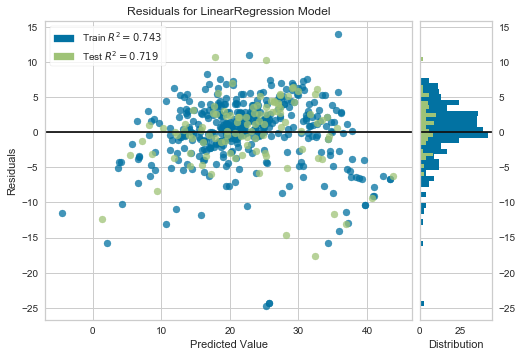

In [82]:
#first we need to shuffle the data to make sure that its completely random 
Nsplit=400
data_total=np.append(X, y, 1)
np.random.shuffle(data_total)
y2=data_total[:,13]
X2=data_total[:,0:13]

Xtrain=X2[0:Nsplit]
ytrain=y2[0:Nsplit]
Xtest=X2[Nsplit:]
ytest=y2[Nsplit:]

reg = linear_model.LinearRegression() 
reg.fit(Xtrain, ytrain)

ytestpred = reg.predict(Xtest)
ytrainpred = reg.predict(Xtrain)


print('test set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytest,ytestpred)))
print('train set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytrain,ytrainpred)))

print('test set root mean squared error: %.2f'
      % np.sqrt((metrics.mean_squared_error(ytest,ytestpred))))
print('train set root mean squared error: %.2f'
      % np.sqrt((metrics.mean_squared_error(ytrain,ytrainpred))))

visualizer = ResidualsPlot(reg)

visualizer.fit(Xtrain, ytrain)  
visualizer.score(Xtest, ytest)  
visualizer.show()                

The mean squared error of test  set and training data is really close to each other. This is has indication that the model is not biased and it does not have high variance. However, it is noteworthy that the results I was getting was changing by each run since the training set is randomly selected so its distribution versus test set is changing so there are some variations for MSE of test set and training set. 

#### d.  Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.
Apparently the residuals seems to be well scattered around zero withouth any specific patttern. Therefore the vairiability that is not explained by our linear model seems to be random normally distributed. Although there are some outliers which are shown to be far apart from zero.So overall, the linear model seems to be a acceptable model.  

### As discussed in class, one way to avoid overfitting the data is to add a regularizer. Fit the linear regression model with Lasso (L1) regularizer added to cost function and determine a suitable value of alpha (regularization coefficient). Report mean squared error (MSE) for training and testing, and the alpha values you chose,for Lasso.

The best alpha is 0.7411784724999999

test set mean squared error (MSE): 26.17
train set mean squared error (MSE): 25.26
test set, root mean squared error: 5.12
train set, root mean squared error: 5.03


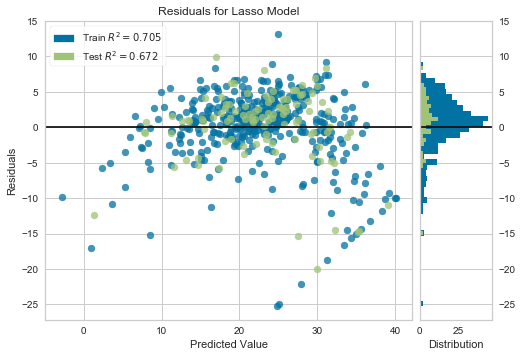

In [84]:


lasso_cv = linear_model.LassoCV(alphas=None,cv=10, random_state=42, max_iter=10000)


lasso_cv.fit(Xtrain, ytrain)
lasso_cv.score(Xtest,ytest)
best_alpha=lasso_cv.alpha_
print('The best alpha is {}'.format(best_alpha))
print('')
clf = linear_model.Lasso(alpha=best_alpha,random_state=42, max_iter=10000)
clf.fit(Xtrain, ytrain)


ytestpred = clf.predict(Xtest)
ytrainpred = clf.predict(Xtrain)


print('test set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytest,ytestpred)))
print('train set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytrain,ytrainpred)))
print('test set, root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(ytest, ytestpred)))
print('train set, root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(ytrain, ytrainpred)))

visualizer = ResidualsPlot(clf)

visualizer.fit(Xtrain, ytrain)  
visualizer.score(Xtest, ytest) 
visualizer.show()                

In [85]:
X = np.concatenate((X, np.square(X)), axis=1)

In [87]:

Nsplit=400
data_total=np.append(X, y, 1)
np.random.shuffle(data_total)
y2=data_total[:,13]
X2=data_total[:,0:13]

Xtrain=X2[0:Nsplit]
ytrain=y2[0:Nsplit]
Xtest=X2[Nsplit:]
ytest=y2[Nsplit:]

reg = linear_model.LinearRegression() 
reg.fit(Xtrain, ytrain)

ytestpred = reg.predict(Xtest)
ytrainpred = reg.predict(Xtrain)


print('test set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytest,ytestpred)))
print('train set mean squared error (MSE): %.2f'
      % (metrics.mean_squared_error(ytrain,ytrainpred))) 
print('test set root mean squared error: %.2f'
      % np.sqrt((metrics.mean_squared_error(ytest,ytestpred))))
print('train set root mean squared error: %.2f'
      % np.sqrt((metrics.mean_squared_error(ytrain,ytrainpred))))

test set mean squared error (MSE): 85087.69
train set mean squared error (MSE): 16446.18
test set root mean squared error: 291.70
train set root mean squared error: 128.24


# Question 4: Bias vs. Variance (10 pts)


(a) State briefly what you understand by the bias-variance tradeoff.

(b) For a given model and problem, what happens to these two quantities when the amount of training data available decreases?

(c) Suppose you decide to use k-Nearest Neighbors (KNN) classifier for a classification problem. In this problem, assume that you are given a fixed sample size. However, you need to make the choice of $k$, the number of neighbors to be used. Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of "$k$".



### Answer: 

(a) it is known that we can decompose the error of the learned model into three parts: irreducible, bias and variance. Irreducible errors are not reducable  regardless of what algorithm is used.Bias happens when the model can not predict the new not seen data accurate enough due to the fact that the assumed model was too simple and it suffers from the so called underfitting. Generally these types of model are easy to learn and fast. The high variance case is the case that the model can not predict the new not seen data accurate enough due to the fact that the model has memorized the training data and it suffers from the so called overfitting. In this case,the estimate of the model will change considerably with a small change in the training data. 


(b) Assume that we are suffering from high variance, reducing the data size might reduce the capability to fit complex model so one may argue that  we can reduce the variance. However, we can still overfit to data. in principle when we have lower amount of data both the variance and bias should get worse. The point is that if we have lower amount of data we can not generalize to new data set which has different distribution with respect to the training data. Besides, lower data means that we can highly skewed toward seen data and make a model to memorize the trend in the . training which then makse our model suffering from high variance. 


(c) in KNN the lower the K the higher are the fluctuations. So for really low K values the model memrizes the fluctuations in the training data. That might results in a really high accuracy for training data but it will have low performance for the test data  due to the overfitting (high variance). On the other hand, as we increase K, then we are considering more point and as a consequence level of fluctuations go down. If we consider a really high K value, it is same as considering average of a lot of points which simplifies the model and our model suffers from high bias. Therefor selecting a K should be a balance between low k (high variance) and high k (high bias). 

# Question 5 - Decision Tree (20pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a Decision tree and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data using Gini score and information gain score seperatly. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Use the plot_tree to show how each tree structure.
5. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Gini accuracy is 0.8846153846153846:
information gain accuracy is 0.8692307692307693:
Gini average per class accuracy is 0.8928571428571428:
information gain average per class accuracy is 0.8692307692307693:


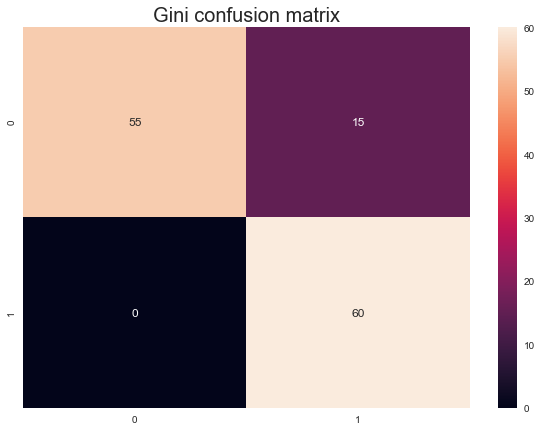

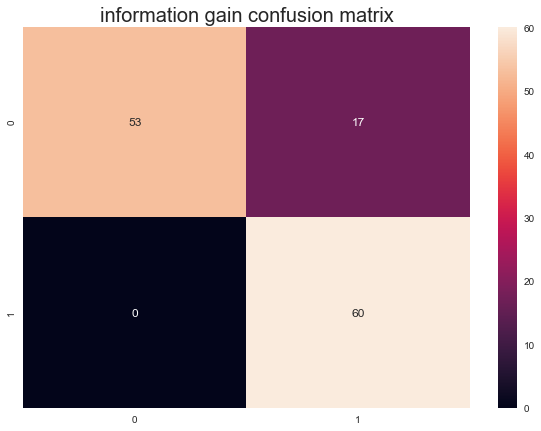

In [93]:
# from sklearn.tree import tree.DecisionTreeClassifier
#Q1
df_auto=pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
md_mpg=np.median(df_auto['mpg'])
df_auto['mpg01']=df_auto['mpg']>md_mpg
df_auto['mpg01']=df_auto['mpg01'].astype(int)

Xa=df_auto[df_auto.columns.difference(['mpg01','mpg'])]
ya=df_auto['mpg01']
#Q2
Xa_train, Xa_test, ya_train, ya_test = model_selection.train_test_split(Xa, ya, random_state=42,test_size=0.33)

clfgini = tree.DecisionTreeClassifier(criterion="gini")
clfgini = clfgini.fit(Xa_train, ya_train)
y_predgini = clfgini.predict(Xa_test)
conf_ginin=metrics.confusion_matrix(ya_test, y_predgini)
gini_acc=(conf_ginin[0,0]+conf_ginin[1,1])/np.sum(conf_ginin)
gini_accclass=((conf_ginin[0,0]/(conf_ginin[0,0]+conf_ginin[0,1]))+(conf_ginin[1,1]/(conf_ginin[1,0]+conf_ginin[1,1])))/2

plt.figure(figsize = (10,7))
sns.heatmap(conf_ginin, annot=True)
plt.title('Gini confusion matrix', fontsize=20)

clfinfo = tree.DecisionTreeClassifier(criterion="entropy")
clfinfo = clfinfo.fit(Xa_train, ya_train)
y_predinfo = clfinfo.predict(Xa_test)
conf_info=metrics.confusion_matrix(ya_test, y_predinfo)
info_acc=(conf_info[0,0]+conf_info[1,1])/np.sum(conf_info)
info_accclass=(conf_info[0,0]+conf_info[1,1])/np.sum(conf_info)

#### note that based on the link provided for binary class the average per class accuracy is same as the accracy
### Besides qusetion 125 on Piazza was answered and confirmed that these are the same for this case
plt.figure(figsize = (10,7))
sns.heatmap(conf_info, annot=True)
plt.title('information gain confusion matrix', fontsize=20)


print('Gini accuracy is {}:'.format(gini_acc))
print('information gain accuracy is {}:'.format(info_acc))
print('Gini average per class accuracy is {}:'.format(gini_accclass))
print('information gain average per class accuracy is {}:'.format(info_accclass))


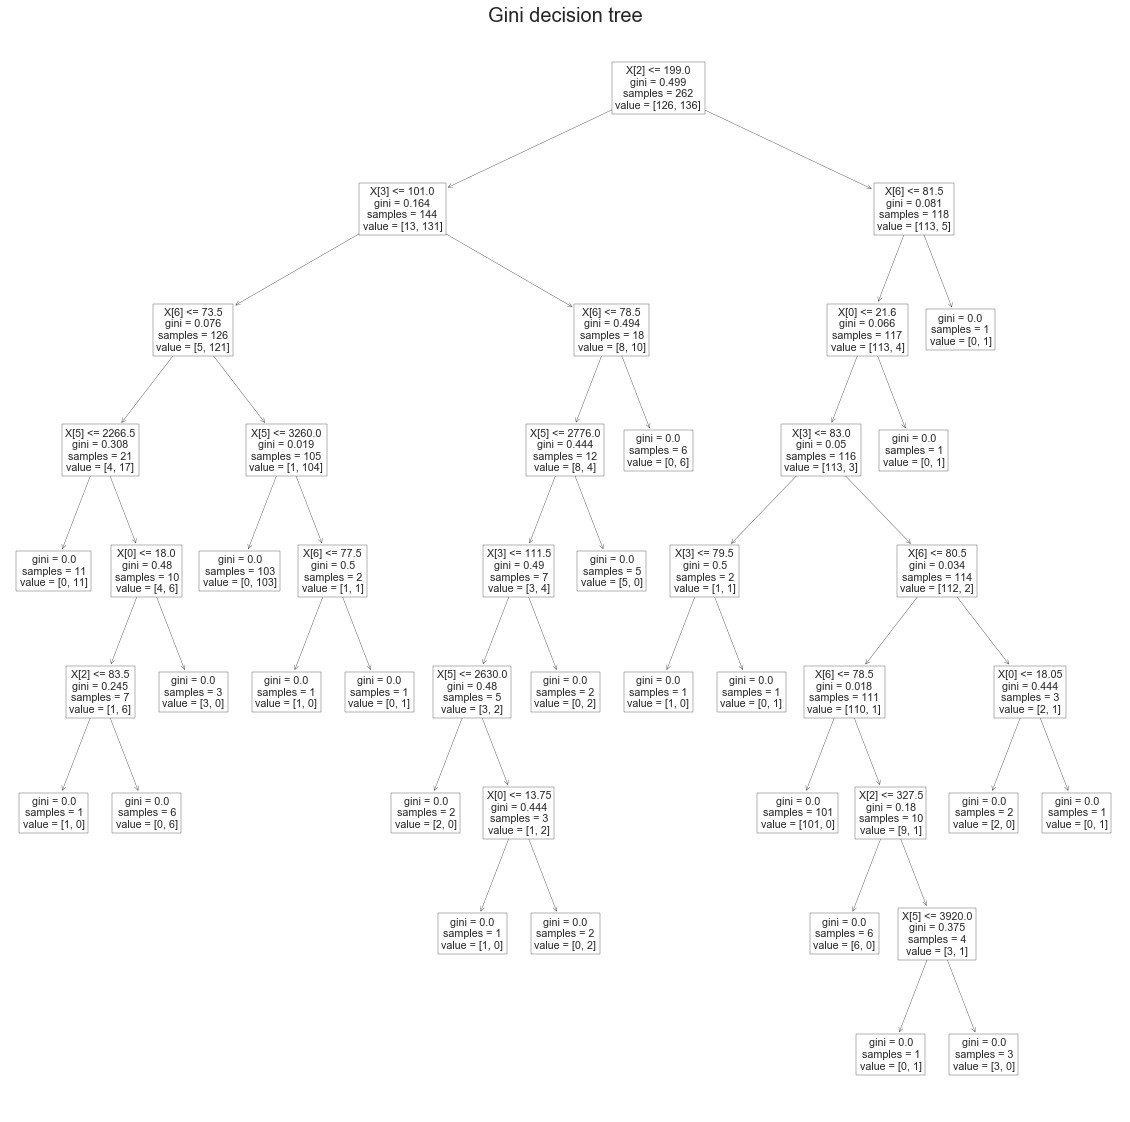

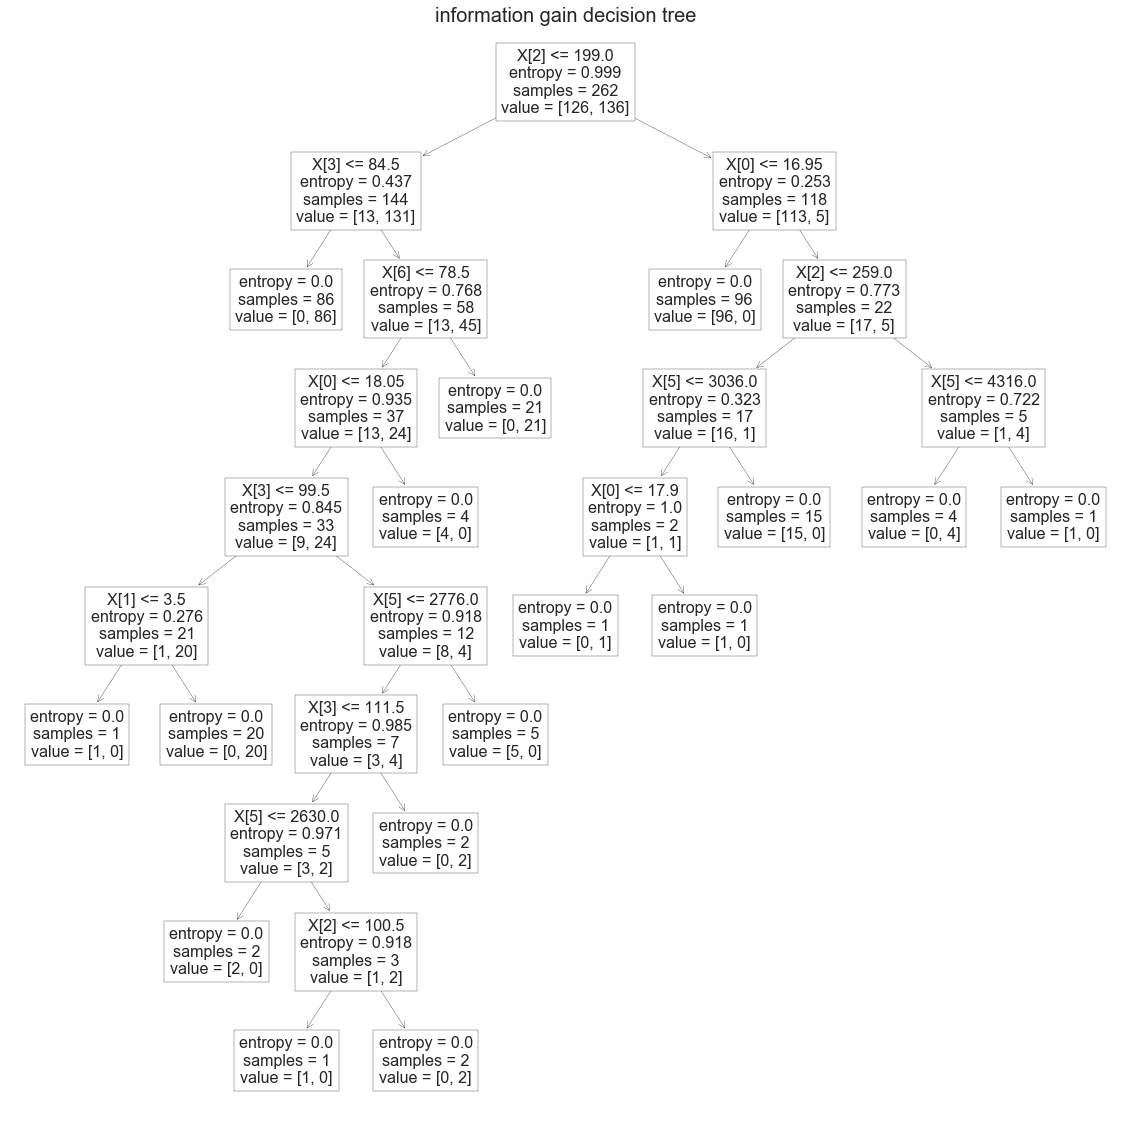

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))  
tree.plot_tree(clfgini, ax=ax)
plt.title('Gini decision tree', fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(20, 20))  
tree.plot_tree(clfinfo, ax=ax)
plt.title('information gain decision tree', fontsize=20)
plt.show()


The performance does not seem to be considerably different. In the paper "Theoretical comparison between the Gini Index and Information Gain criteria" by Raileanu & Stoffel (2004) has also pointed that in just about 2% of the cases the difference between these are considerable.

Apparently each model has different metrics for selecition of the internal nodes. It is obvious that each uses different features at different depths. But overall the accuracy seems to be really close and it is in agreement with litreature. 